# Cosas importantes por recordar

Configurar presición de big float:

In [65]:
setprecision(BigFloat, 1000)
BigFloat("1.3430000000000000000000000000000000000000000000000000000000000000000000000000000000000003")

1.34300000000000000000000000000000000000000000000000000000000000000000000000000000000000030000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000009

## Vectores y matrices

Hay tres formas de crear vectores:

In [66]:
v = collect(1:5)

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

In [67]:
w = [1,2,3,4,5]

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

In [68]:
u = [1 2 3 4 5]

1×5 Array{Int64,2}:
 1  2  3  4  5

## Cómo funciona el push! y el append! para hacer crecer vectores

In [69]:
?push!

search: push! pushfirst! pushdisplay



```
push!(collection, items...) -> collection
```

Insert one or more `items` at the end of `collection`.

# Examples

```jldoctest
julia> push!([1, 2, 3], 4, 5, 6)
6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
```

Use [`append!`](@ref) to add all the elements of another collection to `collection`. The result of the preceding example is equivalent to `append!([1, 2, 3], [4, 5, 6])`.

---

```
push!(sc, k=>v)
```

Argument `sc` is a SortedDict or SortedMultiDict and `k=>v` is a key-value pair. This inserts the key-value pair into the container. If the key is already present, this overwrites the old value. The return value is `sc`. Time: O(*c* log *n*)

---

```
push!(sc, k=>v)
```

Argument `sc` is a SortedDict or SortedMultiDict and `k=>v` is a key-value pair. This inserts the key-value pair into the container. If the key is already present, this overwrites the old value. The return value is `sc`. Time: O(*c* log *n*)

---

```
push!(sc, k)
```

Argument `sc` is a SortedSet and `k` is a key. This inserts the key into the container. If the key is already present, this overwrites the old value. (This is not necessarily a no-op; see below for remarks about the customizing the sort order.) The return value is `sc`. Time: O(*c* log *n*)

---

```
push!(cb)
```

Add an element to the back and overwrite front if full.


In [70]:
push!(w,6,7,8)

8-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
 7
 8

In [71]:
append!(w,v)

13-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
 7
 8
 1
 2
 3
 4
 5

También se pueden hacer matrices haciendo listas horizontales de listas verticales:

In [72]:
A = [3v 2v 4v 1v 5v]

5×5 Array{Int64,2}:
  3   2   4  1   5
  6   4   8  2  10
  9   6  12  3  15
 12   8  16  4  20
 15  10  20  5  25

Ubicar elementos de la matriz:

In [73]:
A[3,4]

3

Sin embargo, no se pueden hacer matrices de listas verticales de listas horizontales

In [74]:
B = [3u, 2u, 4u,u,5u]

5-element Array{Array{Int64,2},1}:
 [3 6 … 12 15] 
 [2 4 … 8 10]  
 [4 8 … 16 20] 
 [1 2 … 4 5]   
 [5 10 … 20 25]

Para acceder a un elemento de una lista, vasta nombrar la lista, abrir un corchete y poner el índice de elemento que se quiere acceder

In [75]:
B[1][4]

12

Método cool para obtener todos los elementos de una columna o un reenglón

In [76]:
A[3,:]

5-element Array{Int64,1}:
  9
  6
 12
  3
 15

## Operaciones

Es importante esta parte, ya que nos indica cómo utilizar y diferenciar el producto punto y el producto entrada a entrada

In [77]:
using LinearAlgebra
a = [2,3,5.33] 
b = [-1.2,3.3,1.33]
a⋅b, a×b, norm(a), a.*b, a.^3, length(A)

(14.588899999999999, [-13.599, -9.056, 10.2], 6.434974747425199, [-2.4, 9.9, 7.0889], [8.0, 27.0, 151.419], 25)

Notemos que tanto el producto "*", como la potencia "^", para el caso de listas, se requiere usar un punto antes de la operación. Esto significa que se aplicará esa operación a todos los elementos de la lista. Esto es general: 


In [78]:
sin.(a)

3-element Array{Float64,1}:
  0.9092974268256817
  0.1411200080598672
 -0.8152642144499634

In [79]:
A = rand(3,3)
A*b, A*A, inv(A), transpose(A), size(A)

([2.43641, 1.34604, 1.75113], [0.668673 0.64436 1.05784; 0.745666 0.750955 0.754571; 0.748087 0.806773 1.03905], [-2.87595 -0.856895 3.9748; 2.74073 -0.413507 -1.61092; 0.537439 1.46484 -1.11422], [0.411471 0.319201 0.618117; 0.71013 0.155841 0.547407; 0.441163 0.913387 0.51611], (3, 3))

## Existen algunas otras operaciones sobre listas que no son matemáticas, como agregar un elemento a una lista o quitarlo: 

In [80]:
push!(a,6)
a

4-element Array{Float64,1}:
 2.0 
 3.0 
 5.33
 6.0 

In [81]:
pop!(a)
a

3-element Array{Float64,1}:
 2.0 
 3.0 
 5.33

In [82]:
insert!(a,3,20.)
a

4-element Array{Float64,1}:
  2.0 
  3.0 
 20.0 
  5.33

In [83]:
deleteat!(a,2)

3-element Array{Float64,1}:
  2.0 
 20.0 
  5.33

Observemos que en todas estas operaciones (funciones) tenemos que terminan con un signo de interrogación, esto provoca que se reescriba la variable con la que estamos trabajando

## Para incertar variables dentro de un texto se puede usar el símbolo $: 

In [84]:
nombre = "Bee"
a = "hola $(nombre), cómo te va?"

"hola Bee, cómo te va?"

## Una forma de definir conjuntos:

In [85]:
X = [x^2-x+1 for x in 0.3:0.01:.8]

51-element Array{Float64,1}:
 0.79              
 0.7861            
 0.7824            
 0.7788999999999999
 0.7756000000000001
 0.7725            
 0.7696000000000001
 0.7669            
 0.7644            
 0.7621            
 0.76              
 0.7581            
 0.7564            
 ⋮                 
 0.7861            
 0.79              
 0.7941            
 0.7984            
 0.8029            
 0.8076            
 0.8125            
 0.8176            
 0.8229            
 0.8284            
 0.8341000000000001
 0.8400000000000001

# Funciones

En general podemos definir funciones como lo hacemos en cálculo, poniendo el nombre de la función, seguido de paréntecis que dentro tienen los argumentos que se evaluarán, después un signo de igual y seguido de eso las instrucciones sobre cómo operar la función. Por ejemplo:

In [86]:
Area_circulo(r) = π*r^2
Area_circulo(2)

12.566370614359172

Sin embargo, hay algunas funciones lo suficientemente complejas que utilizan condicionales y ciclos para definirse. Estas funciones se pueden definir utilizando la palabra function:

In [87]:
function Saludo(nombre, hora)
    a = :string
    if hora<12
        a = "buenos días, $(nombre), ¿cómo te va?"
    elseif 12<=hora<18
        a = "buenas tardes, $(nombre), ¿cómo te va?"
        return "estoy ocupado"
    else
        a = "buenas noches, $(nombre), ¿cómo te va?"
    end
    for i in 1:2
        
    end
    a
end

Saludo("Ata",36)

"buenas noches, Ata, ¿cómo te va?"

In [88]:
function BabylonianRoot(y :: Real)
    x = 2
    for i in 1:3
        x = 0.5(x+y/x)
    end
    return x
end

BabylonianRoot(2)
    

1.4142156862745097

## Graficando con PyPlot

In [3]:
xx = rand(10)
yy = rand(10)

10-element Array{Float64,1}:
 0.660720248106712   
 0.025771922779860734
 0.6877864948873138  
 0.9200755107753644  
 0.4301248606624566  
 0.727318743035285   
 0.19520281886601887 
 0.6881410579034162  
 0.20605098835531788 
 0.396711854214572   

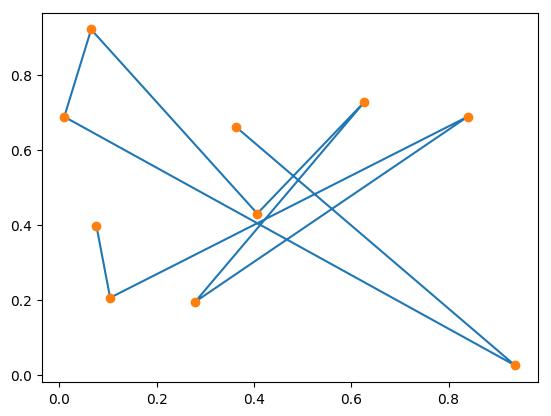

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff65dd94da0>

In [5]:
using PyPlot
import PyPlot

plot(xx, yy)
plot(xx, yy, "o")
#plot(xx)


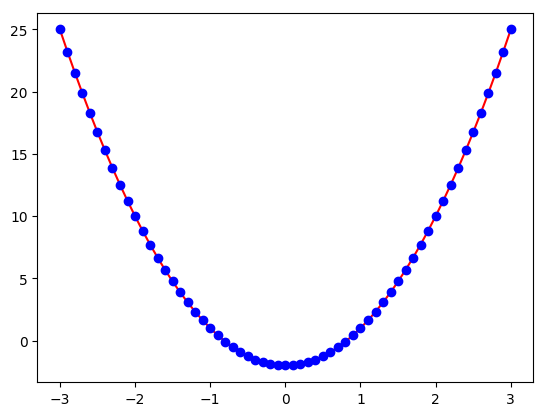

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff65de1ba20>

In [1]:
using PyPlot
import PyPlot
x = -3:0.1:3
y = 3*(x.^2) .- 2

plot(x,y,"r")
plot(x,y,"ob")

## Newton Raphson graficado

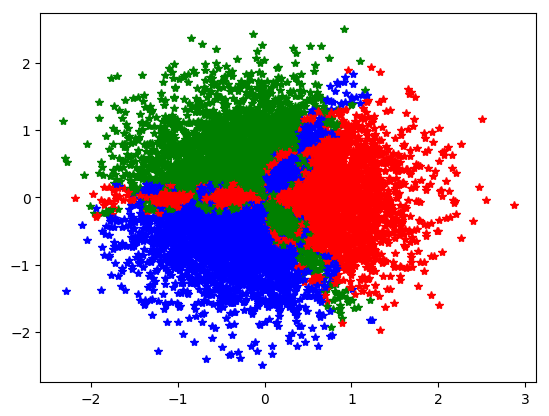

In [167]:
function NR(f,f′)
    A = randn(ComplexF64,10000)
    YY = []
    XX = []
    C = []
    for i in 1:10000
        push!(XX,real.(A[i]))
        push!(YY,imag.(A[i]))
        for j in 1:100
            A[i] = A[i] - f(A[i])/f′(A[i])
        end
        push!(C,A[i])
    end
    for k in 1:10000
        if C[k] == 1
            plot(XX[k],YY[k],"*r")
        elseif imag(C[k]) < 0
            plot(XX[k],YY[k],"*b")
        elseif imag(C[k]) > 0
            plot(XX[k],YY[k],"*g")
        end
    end
end
polinomio(x) = x^3-1
derivada(x) = 3x^2
NR(polinomio, derivada)

# Clase 8/Febrero/19

## Estructuras

In [93]:
using LinearAlgebra
a = rand(10)
maximum(a)
minimum(a)

0.16209060379426332

Funciones que se definen por el momento sin nombre, funciones anónimas, pues.

In [94]:
x -> x[2]

#13 (generic function with 1 method)

In [95]:
sort(a , rev = true)

10-element Array{Float64,1}:
 0.8435554081931493 
 0.8406057919157133 
 0.7028794735396178 
 0.6884424968249443 
 0.6693453808717857 
 0.6096860055448579 
 0.4324051539418907 
 0.41790707962155405
 0.3601350891952344 
 0.16209060379426332

In [96]:
?sort()
?revert()
?by()

LoadError: Invalid @var syntax `extra token after end of expression`.

Checar revert y by como funciones aplicadas a sort para la tarea

## Arboles binarios

search:

Couldn't find linetype
Perhaps you meant eltype


No documentation found.

Binding `linetype` does not exist.


# Gráficas

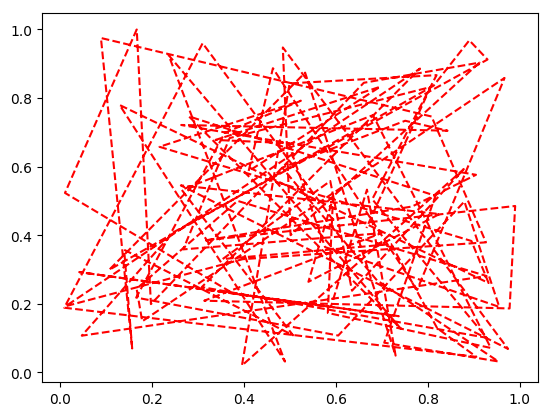

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff657ce5908>

In [10]:
using PyPlot
import PyPlot
X = rand(100)
Y = rand(100)
plot(X,Y, "--r")

Checar también seriestype, usar siempre ?aspect_ratio = equal

## Librerías

In [103]:
using BenchmarkTools


ArgumentError: ArgumentError: Package BenchmarkTools not found in current path:
- Run `import Pkg; Pkg.add("BenchmarkTools")` to install the BenchmarkTools package.
